In [1]:
import pandas as pd
import sqlite3

QUERY = """\
    select
    weekend, total, con, cast((con*100.0)/total as integer) pctcon, bod, cast((bod*100.0)/total as integer) pctbod
    from (
        select
        strftime("%Y%m%d", date, "weekday 0") as weekend,
        count(*) total,
        sum(conventional) as con, sum(bodylines > 0) as bod
        from commits where repo = "edx/edx-platform" group by weekend
    )
    where weekend > '202009';
    """

# Read sqlite query results into a pandas DataFrame
with sqlite3.connect("commits.db") as con:
    df = pd.read_sql_query(QUERY, con)

# Make the date nice
df["when"] = pd.to_datetime(df["weekend"], format="%Y%m%d")
# Drop the last row, because it's probably incomplete
df = df[:-1]
df.tail()

,weekend,total,con,pctcon,bod,pctbod,when
30,20210404,65,42,64,37,56,2021-04-04
31,20210411,61,37,60,30,49,2021-04-11
32,20210418,77,62,80,29,37,2021-04-18
33,20210425,24,11,45,12,50,2021-04-25
34,20210502,40,24,60,15,37,2021-05-02


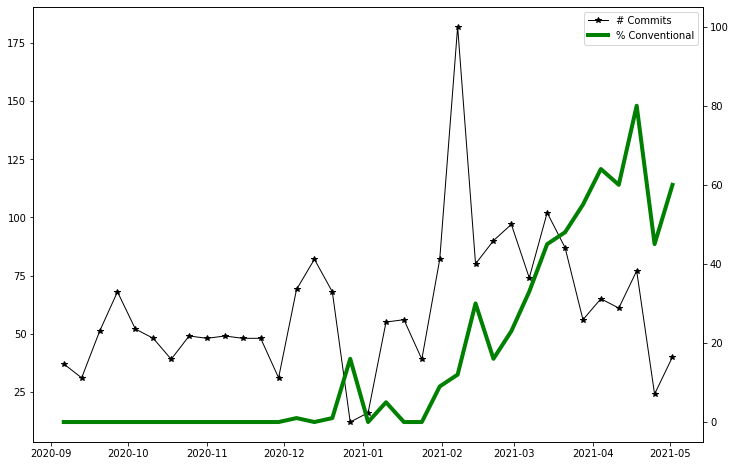

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))

line1 = ax.plot(df.when, df.total, "*-", label="# Commits", color="black", linewidth=1)[0]

ax2 = ax.twinx()
ax2.set_ylim(-5, 105) 
line2 = ax2.plot(df.when, df.pctcon, label="% Conventional", color="green", linewidth=4)[0]

plt.legend([line1, line2], [line1.get_label(), line2.get_label()])
plt.show()